In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# LISSAGE
def lissage(k,v):
    l = []
    n = 2*k+1
    for i in range(k):
        l.append(np.mean(v[:(i+k)]))
    for i in range(k,len(v)-k):
        l.append(np.mean(v[(i-k):(i+k)]))
    for i in range(len(v)-k,len(v)):
        l.append(np.mean(v[(len(v)-k):]))
    return l

def lissage_df(df,k):
    df_lisse = pd.DataFrame(index = df.index)
    for c in df.columns:
        df_lisse[c] = lissage(k, df[c])
    return df_lisse

In [3]:
df = pd.read_csv("stats.csv")
cols = ["taille","min","max","NB_ADD","NB_RM"]
df.head()

step  id  time  taille  min  max  NB_ADD  NB_RM
1   132  16     1      73  114   13      16      2
1   133  14     1      94  101   10      10      2
1   134   0     1      64  100   17      17      2
1   135   0     1      93  110   11      11      2
1   136  15     1      96  100   11      10      2

# EVOLUTION

In [5]:
dfg = df.groupby("step").agg(np.mean)
dfg.head()

id   time  taille    min   max  NB_ADD  NB_RM
step                                                      
132    8.000000    1.5    73.0  114.0  13.0    16.0    2.0
133   92.336996  137.0    94.0  101.0  10.0    10.0    2.0
134    0.000000    1.0    64.0  100.0  17.0    17.0    2.0
135    0.000000    1.0    93.0  110.0  11.0    11.0    2.0
136   94.391144  136.0    96.0  100.0  11.0    10.0    2.0

In [6]:
dflisse = lissage_df(dfg,30)
dflisse.head()

id       time     taille         min       max     NB_ADD  \
step                                                                     
132   41.975812  21.450000  74.766667  134.200000  9.700000  10.666667   
133   40.684953  21.532258  72.419355  139.129032  9.516129  10.645161   
134   40.694799  20.875000  72.718750  137.593750  9.531250  10.625000   
135   39.461623  20.242424  70.515152  143.757576  9.363636  10.636364   
136   39.712752  19.661765  71.264706  142.647059  9.352941  10.617647   

         NB_RM  
step            
132   2.466667  
133   2.838710  
134   2.843750  
135   3.303030  
136   3.264706

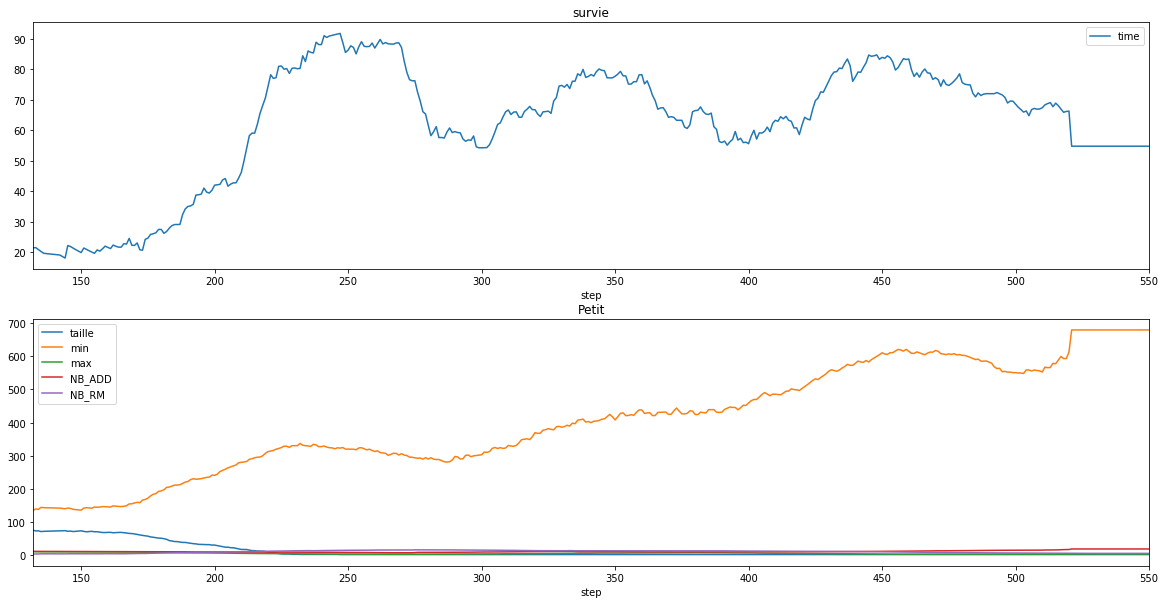

In [7]:
fig,axes = plt.subplots(2,1);
p = dflisse
p.plot(y = ["time"], figsize = (20,10),title = "survie",ax = axes[0])
p.plot(y = cols, figsize = (20,10),title = "Petit",ax = axes[1])

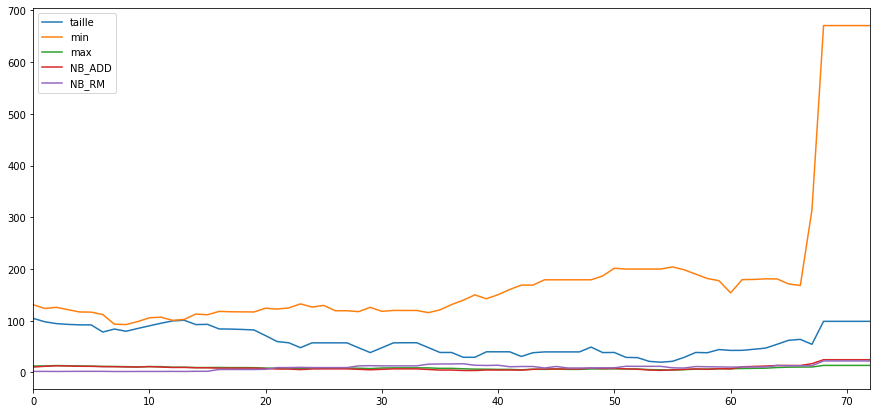

In [8]:
pd.DataFrame(lissage(5,df.groupby("id").apply(max).sort_values("time").set_index("time"))).plot(y = cols,figsize=(15,7))

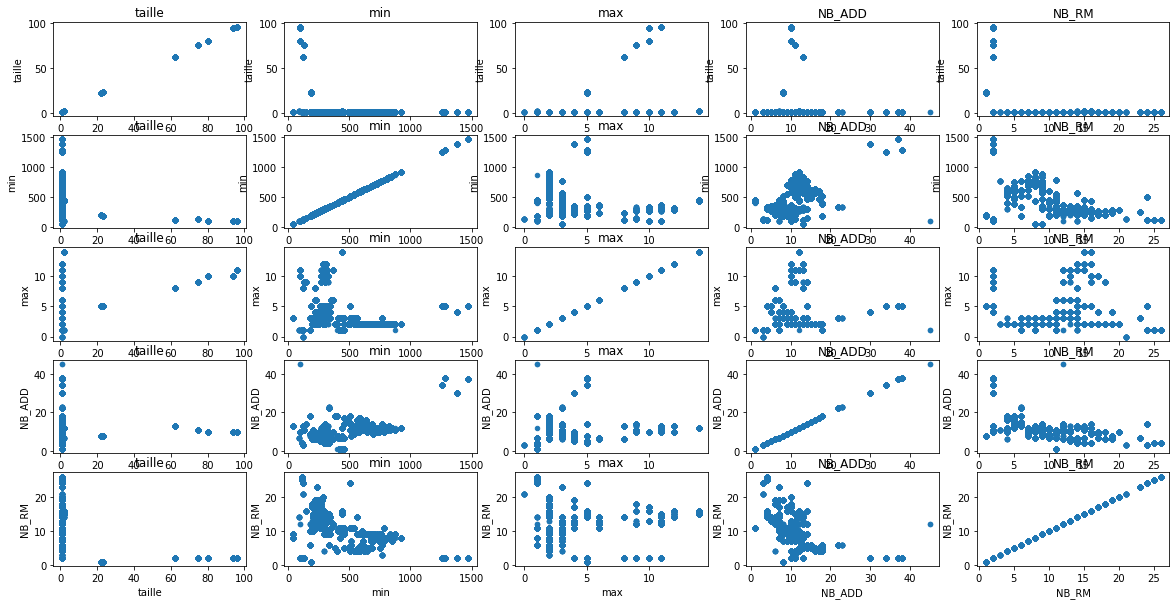

In [10]:
d = len(cols)
fig,axes = plt.subplots(d,d);
for i in range(d):
    for j in range(d):
        df[(df["time"] > 50) ].plot.scatter(x = cols[j], y = cols[i],ax=axes[i,j],figsize = (20,10),title=cols[j])